In [2]:
import os
import sys
import glob
import cv2
import matplotlib.pyplot as plt # 주피터 환경에서 이미지 열어주는거
import numpy as np

In [3]:
# 이미지를 전부 읽어와서 하나로 합친다.
train_images = []

image = cv2.imread('faces_training/face01.pgm', cv2.IMREAD_GRAYSCALE)
train_images.append(image)

length, height = image.shape
image = image.reshape((1, length * height * 1))

for i in range(2,10):
    x = cv2.imread(f'faces_training/face0{i}.pgm', cv2.IMREAD_GRAYSCALE)
    train_images.append(x)
    temp = x.reshape((1, length * height * 1))
    image = np.concatenate([image, temp], axis=0)
    
for i in range(10,40):
    x = cv2.imread(f'faces_training/face{i}.pgm', cv2.IMREAD_GRAYSCALE)
    train_images.append(x)
    temp = x.reshape((1, length * height * 1))
    # print(temp.shape)
    image = np.concatenate([image, temp], axis=0)

# image = np.concatenate([x,y,z], axis=0)
print(image.shape)

(39, 32256)


In [16]:
print("######### Step1 #########\n")
    
def computeDimensions(img, percent=0.9):
    
    # computing eigenvalues and eigenvectors of covariance matrix
    matrix = (img - np.mean(img.T, axis=1)).T # subtract the mean (along columns)

    [eigvals, eigvec] = np.linalg.eig(np.cov(img))
    
    whole_nom_of_pc = np.size(eigvec, axis=0)
    
    eigvals = sorted(eigvals)
    eigvals = eigvals[::-1]
    
    ssum = 0
    numPc=0
    sumvar = sum(eigvals)
        
    for i in range(whole_nom_of_pc):
        ssum += eigvals[i]
        print(eigvals[i])
        numPc += 1
        # print(f"현재 고유 값{i} : {eigvals[i]}")
        if(ssum/sumvar >= percent):
            print("확률 : ",ssum/sumvar)
            break
    
    print("전체 차원 수 ", whole_nom_of_pc)
    print("선택된 차원 수 ", numPc)    
    return numPc
    
perc = 0.95
numPc = computeDimensions(image, perc)
# print(f"nput Percentage: {sys.argv[1]}")
print(f"Input Percentage: {perc}\n")
print(f"Selected Dimansion : {numPc}\n")
    

######### Step1 #########

37254.77165671918
4079.03252985013
3095.0674060306465
2814.357275833147
2590.1419663099214
2008.3373029306101
1641.2676210540426
1525.3515098329956
1174.694377167604
1101.0270501283164
945.7783766377105
906.3412825397879
813.6297388294269
736.0485112439512
680.0404629371345
639.701826577086
582.8191182085255
527.7661532207727
481.88630687685855
448.91355282495357
420.7328420403262
399.602522949724
386.59266856546293
366.9286591002731
345.4862685526222
확률 :  0.9544373321743819
전체 차원 수  39
선택된 차원 수  25
Input Percentage: 0.95

Selected Dimansion : 25



In [5]:
# for step2,
# reconsturct 함수
def princomp(img, pc_limit=0):

    # computing eigenvalues and eigenvectors of covariance matrix
    matrix = (img - np.mean(img.T, axis=1)).T # subtract the mean (along columns)
    
    [eigvals,eigvecs] = np.linalg.eig(np.cov(matrix))
    
    whole_num_pc = np.size(eigvecs,axis=1)

    sortEigvals = sorted(eigvals) # 고유값을 정렬한다.
    sortEigvals = sortEigvals[::-1]       # in ascending order. 순서를 높은게 앞에 오도록 변경
    # sorting eigenvectors according to the sorted eigenvalues
    # 고유값이 정렬된 순서에 따라 대응하는 고유벡터들도 정렬한다.
    # coeff = coeff[:,sortEigvals]
    
    # eigvals = eigvals[sortEigvals] # sorting eigenvalues
    if pc_limit < whole_num_pc and pc_limit >= 0:
        eigvecs = eigvecs[:,range(pc_limit)] # 입력된 pc 개수에 따라 선택한다.
        eigvals = eigvals[:pc_limit]
    
    print(eigvecs.shape)
    score = np.dot(eigvecs.T,matrix) # projection of the data in the new space
    final = np.dot(eigvecs, score).T + np.mean(img, axis=0)
    return eigvecs,score,eigvals, final

In [7]:
final_list = []

for n in range(39):
    img = (train_images[n]-np.mean(train_images[n].T,axis=1)) # subtract the mean (along columns)
    
    eigenvector, score, eigenvalue, final = princomp(train_images[n], numPc)
    final_list.append(np.abs(final))

    row, col = train_images[n].shape
    summ = 0
    for i in range(row):
        for j in range(col):
            s = (train_images[n][i][j]-np.abs(final[i][j]))**2
            summ += s # 전체 합.
    re_error = summ/(row*col) # 전체합을 n으로 나누고 복소수를 float으로 전환
    print(f"Reconstructed error :{round(re_error, 4)}") # Reconstruction error 소숫점 4자리까지 보여짐

# final_list[0] 은 face01의 리컨스트럭션 이미지다.

(168, 21)
Reconstructed error :19.5209
(168, 21)
Reconstructed error :12.9484
(168, 21)
Reconstructed error :20.0204
(168, 21)
Reconstructed error :10.7292
(168, 21)
Reconstructed error :24.5289
(168, 21)
Reconstructed error :21.8178
(168, 21)
Reconstructed error :12.7641
(168, 21)
Reconstructed error :16.3334
(168, 21)
Reconstructed error :14.7948
(168, 21)
Reconstructed error :25.8667
(168, 21)
Reconstructed error :15.7
(168, 21)
Reconstructed error :18.2981
(168, 21)
Reconstructed error :16.843
(168, 21)
Reconstructed error :16.2112
(168, 21)
Reconstructed error :18.4964
(168, 21)
Reconstructed error :17.4844
(168, 21)
Reconstructed error :19.0333
(168, 21)
Reconstructed error :13.5554
(168, 21)
Reconstructed error :15.194
(168, 21)
Reconstructed error :10.6316
(168, 21)
Reconstructed error :20.1433
(168, 21)
Reconstructed error :26.6685
(168, 21)
Reconstructed error :17.1372
(168, 21)
Reconstructed error :13.1527
(168, 21)
Reconstructed error :19.7814
(168, 21)
Reconstructed error 

In [114]:
test01 = cv2.imread('faces_test/test02.pgm', cv2.IMREAD_GRAYSCALE)

print(len(final_list))
print(final_list[0].shape)
print("######### Step3 #########")
row, col = test01.shape
for a in range(1,6):
    distances = []
    test01 = cv2.imread(f'faces_test/test0{a}.pgm', cv2.IMREAD_GRAYSCALE)
    for n in range(39): 
        sum_of=0
        for r in range(row):
            for c in range(col):
                sum_of += (test01[r][c]-final_list[n][r][c])**2
        distances.append(np.sqrt(sum_of))
    found = distances.index(min(distances)) + 1
    if found >= 10 : print(f"test0{a}.pgm ==> face{found}.pgm")
    else : print(f"test0{a}.pgm ==> face0{found}.pgm")



39
(192, 168)
######### Step3 #########
test01.pgm ==> face11.pgm
test02.pgm ==> face07.pgm
test03.pgm ==> face19.pgm
test04.pgm ==> face23.pgm
test05.pgm ==> face35.pgm


In [58]:
test01 = cv2.imread('faces_test/test01.pgm', cv2.IMREAD_GRAYSCALE)

eigenvector, score, eigenvalue, tf = princomp(test01, numPc)

print(len(final_list))
print(final_list[0].shape)

row, col = test01.shape
distances = []
for n in range(39): 
    sum_of=0
    for r in range(row):
        for c in range(col):
            sum_of += (tf[r][c]-final_list[n][r][c])**2
    distances.append(np.sqrt(sum_of))

print(distances)
found = distances.index(min(distances)) + 1
print(found)



39
(192, 168)
[6030.343623650764, 8686.624613345479, 7049.724783722562, 7785.366708591398, 9736.16659875407, 7583.831652989635, 7211.932436206916, 7130.609198878587, 7304.662758109978, 9392.386461216422, 4843.56766795864, 7771.264560539638, 7239.084839066912, 13902.471520014516, 8648.765431902888, 8677.778649889422, 7474.013556074829, 6748.721731687042, 7238.889155618456, 6597.873976635354, 7959.520382950866, 8794.650621535648, 7458.113454781669, 6586.942161946845, 5798.237197539785, 7645.051846357443, 9762.28068056328, 8843.465330318462, 10763.66166374329, 7881.382364811592, 7154.975568493266, 8894.844744606997, 6953.047814597506, 7156.52144176358, 9405.456996341132, 7560.4912311799235, 6941.568157868283, 6853.243714646259, 8006.818382629144]
11


In [212]:
import os
import sys
import glob
import cv2
import matplotlib.pyplot as plt # 주피터 환경에서 이미지 열어주는거
import numpy as np

STUDENT_CODE = '2017147505'
FILE_NAME = 'output.txt'
if not os.path.exists(STUDENT_CODE):
    os.mkdir(STUDENT_CODE)
f = open(os.path.join(STUDENT_CODE, FILE_NAME),'w')

# f.write("aaa")
# f.close()
# 이미지를 전부 읽어와서 vectorize한 다음 하나로 합친다.
train_images = []

image = cv2.imread("faces_training/face01.pgm", cv2.IMREAD_GRAYSCALE)
train_images.append(image)

length, height = image.shape
image = image.reshape((length * height * 1, 1))

for i in range(2, 10):
    x = cv2.imread(f"faces_training/face0{i}.pgm", cv2.IMREAD_GRAYSCALE)
    train_images.append(x)
    temp = x.reshape((length * height * 1, 1))
    image = np.concatenate([image, temp], axis=1)

for i in range(10, 40):
    x = cv2.imread(f"faces_training/face{i}.pgm", cv2.IMREAD_GRAYSCALE)
    train_images.append(x)
    temp = x.reshape((length * height * 1, 1))
    # print(temp.shape)
    image = np.concatenate([image, temp], axis=1)

train_all_image = image
print(image.shape)


def computeDimensions(img, percent=0.9):
    
    # computing eigenvalues and eigenvectors of covariance matrix
    img_mean = np.mean(img.T, axis=1)
    img = (img - img_mean)

    U, Sv, Vt = np.linalg.svd(img, full_matrices=False)
    
    whole_nom_of_pc = np.size(U, axis=0)
    
    # Sv 는 고유값 리스트이다. 
    Sv = sorted(Sv)
    Sv = Sv[::-1]  # 순서를 높은게 앞에 오도록 변경
    eigvals = [x**2 for x in Sv]
    
    sum_of = 0
    numPc=0
    sum_all = sum(eigvals)
    
    print(f"U.shape , {U.shape}")
    print(f"np.diag(Sv).shape, {np.diag(Sv).shape}")
    print(f"Vt.shape, {Vt.shape}")
    
    for e in eigvals:
        sum_of += e
        numPc += 1
        if(sum_of/sum_all >= percent):
            break
    
    U = U[:, :numPc]  # 입력된 pc 개수에 따라 선택한다.
    Sv = np.diag(Sv[:numPc])
    Vt = Vt[:numPc, :]
    
    print("after reduce")
    print(f"U.shape , {U.shape}")
    print(f"(Sv).shape, {(Sv).shape}")
    print(f"Vt.shape, {Vt.shape}")
    
    reconstruct = np.dot(U, np.dot(Sv,Vt)) + img_mean
    
    return reconstruct, numPc

# perc = sys.argv[1]
perc = 0.95

reconstruct, numPc = computeDimensions(image, perc)


print("######### Step1 #########")
f.write("######### Step1 #########\n")
print(f"Input Percentage: {perc}")
f.write(f"Input Percentage: {perc}\n")
print(f"Selected Dimansion : {numPc}")
f.write(f"Selected Dimansion : {numPc}\n")


print(reconstruct.shape)

(32256, 39)
U.shape , (32256, 39)
np.diag(Sv).shape, (39, 39)
Vt.shape, (39, 39)
after reduce
U.shape , (32256, 25)
(Sv).shape, (25, 25)
Vt.shape, (25, 39)
######### Step1 #########
Input Percentage: 0.95
Selected Dimansion : 25
(32256, 39)


import matplotlib.pyplot as plt # 주피터 환경에서 이미지 열어주는거

for n in range(2):
    plt.title("test")
    plt.imshow(train_images[n], cmap='gray')
    plt.show()
    
    U, S, V = np.linalg.svd(train_images[n])
    
    im = np.dot(np.dot(U[:,:25],np.diag(S[:25])),V[:25,:])
    
    plt.title("test")
    plt.imshow(im, cmap='gray')
    plt.show()

    

In [213]:
import matplotlib.pyplot as plt # 주피터 환경에서 이미지 열어주는거

f = open(os.path.join(STUDENT_CODE, FILE_NAME),'w')

print("######### Step2 #########")
f.write("######### Step2 #########\n")

print("Reconstruction error")
f.write("Reconstruction error\n")

re_error = []
re_imgs = []

for n in range(39):
    re_err_sum = 0
    re_img = reconstruct.T[n].reshape(length, height)
    for i in range(row):
        for j in range(col):
            re_err_sum += np.abs(train_images[n][i][j] - re_img[i][j])**2
    
    re_error.append(re_err_sum/(row*col))
    re_imgs.append(re_img)  

print(f"average : {sum(re_error)/len(re_error)}")
f.write(f"average : {sum(re_error)/len(re_error)}\n")
for n in range(1, 10):
    print(f"0{n}: {re_error[n-1]}")
    f.write(f"0{n}: {re_error[n-1]}\n")
    cv2.imwrite(f"{STUDENT_CODE}/face0{n}.png", re_imgs[n-1])
    
for n in range(10, 40):
    print(f"{n}: {re_error[n-1]}")
    f.write(f"{n}: {re_error[n-1]}\n")
    cv2.imwrite(f"{STUDENT_CODE}/face{n}.png", re_imgs[n-1])

f.close()

######### Step2 #########
Reconstruction error
average : 80.743188108986
01: 90.10954779754424
02: 81.60834060202127
03: 112.8817515195717
04: 144.74993788304403
05: 49.93015541452326
06: 88.28189025720393
07: 122.9529913987947
08: 158.62993364811305
09: 128.27324084545663
10: 86.71980615317213
11: 85.94446982122062
12: 47.252939530553185
13: 40.75161324518188
14: 4.153125911714489
15: 41.552103159414756
16: 62.2663483728361
17: 35.34815073430032
18: 58.54195654920177
19: 77.53021033215252
20: 146.88566848663712
21: 23.11861013826295
22: 11.707684612456228
23: 96.85332580659627
24: 96.67877166806427
25: 69.05642876200493
26: 53.41433113497292
27: 11.515978868467514
28: 57.228583270679735
29: 26.99078555663959
30: 109.96545113832336
31: 165.62928643846487
32: 88.12391283583099
33: 131.15586191970414
34: 33.49517468118154
35: 147.0249020452186
36: 81.22056645787144
37: 114.7037513371943
38: 141.41068382243375
39: 25.326064093429256


######### Step3 #########
(32256, 5)


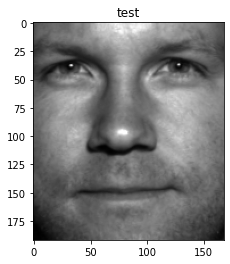

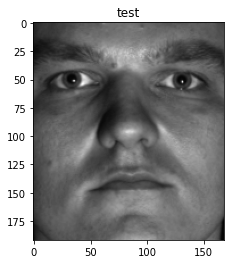

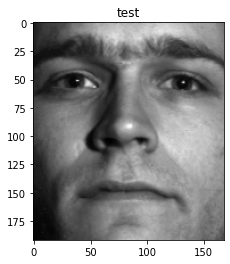

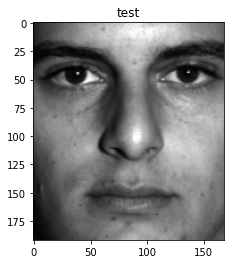

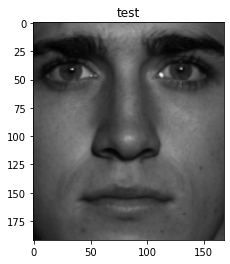

test00.pgm ==> face38.pgm
test01.pgm ==> face22.pgm
test02.pgm ==> face35.pgm
test03.pgm ==> face35.pgm
test04.pgm ==> face22.pgm


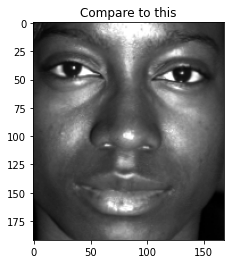

In [231]:

print("######### Step3 #########")

# 우선 test 의 이미지도 reconstruct 한다.
###
def princomp(img, pc_limit=0):
    #특잇값 분해
    img_mean = np.mean(img)
    img = img - img_mean
    Ursv, Sv, Vlsvt = np.linalg.svd(img, full_matrices=False)
    
    eigvals = [x**2 for x in Sv]
    
    sum_of = 0
    numPc=0
    sum_all = sum(eigvals)
    
    for e in eigvals:
        sum_of += e
        numPc += 1
        if(sum_of/sum_all >= pc_limit):
            print(sum_of/sum_all)
            break
            
    print(f"numPc : {numPc}")
    
    Ursv = Ursv[:, :numPc]  # 입력된 pc 개수에 따라 선택한다.
    Sv = np.diag(Sv[:numPc])
    Vlsvt = Vlsvt[:numPc, :]
    
    """
    Ursv = Ursv[:, range(pc_limit)]  # 입력된 pc 개수에 따라 선택한다.
    Sv = np.diag(Sv[:pc_limit])
    Vlsvt = Vlsvt[:pc_limit,:]
    """
    
    fin = np.dot(Ursv, np.dot(Sv, Vlsvt)) + img_mean
    return fin

###


test_images = []

imagett = cv2.imread("faces_test/test01.pgm", cv2.IMREAD_GRAYSCALE)
test_images.append(image)

length, height = imagett.shape
imagett = imagett.reshape((length * height * 1, 1))

for i in range(2, 6):
    x = cv2.imread(f"faces_test/test0{i}.pgm", cv2.IMREAD_GRAYSCALE)
    test_images.append(x)
    temp = x.reshape((length * height * 1, 1))
    imagett = np.concatenate([imagett, temp], axis=1)

print(imagett.shape)

for a in range(5):
    im = imagett[:,a].reshape(192,168)
    plt.title("test")
    plt.imshow(im, cmap='gray')
    plt.show()
    
def return_most_similar(img1, img2):
    
    return img1


def similarity_between_faces(face_test, face_train, plot=False):
    face_diff = imagett[:, face_test] - train_all_image[:, face_train]
    return np.linalg.norm(face_diff)

def find_most_similar_to(face_find, plot=False):
    best_scores = [9999999]
    best_face_i = [0]

    for face_i in range(39):
        sim = similarity_between_faces(face_find, face_i)
        for i, best_sim in enumerate(best_scores):
            if sim < best_sim: # 낮을수록 좋다.
                best_scores[i] = sim
                best_face_i[i] = face_i
                break
    
    plt.title('Compare to this')
    plt.imshow(imagett[:, face_find].reshape(192, 168), cmap='gray')
    
    plt.imshow(train_all_image[:, best_face_i[0]].reshape(192, 168), cmap='gray')
    
    return best_face_i, best_scores

row, col = re_imgs[0].shape

for a in range(5):
    distances = []
    test01 = cv2.imread(f'faces_test/test0{a}.pgm', cv2.IMREAD_GRAYSCALE)
    # test = princomp(test01, perc)
    
    for n in range(39): 
        sum_of=0
        """
        for r in range(row):
            for c in range(col):
                sum_of += (test[r][c] - re_imgs[n][r][c])**2
        distances.append(np.sqrt(sum_of))
        """
        # distances.append(np.linalg.norm(test01-re_imgs[n]))
        distances.append(similarity_between_faces(a, n, plot=True))
        
    found = distances.index(min(distances)) + 1
    find_most_similar_to(a)
    """
    plt.title("test")
    plt.imshow(re_imgs[found-1], cmap='gray')
    plt.show()
    """
    
    if found >= 10 : 
        print(f"test0{a+1}.pgm ==> face{found}.pgm")
    else : 
        print(f"test0{a+1}.pgm ==> face0{found}.pgm")


In [254]:

print("######### Step3 #########")

# 우선 test 의 이미지도 reconstruct 한다.
###
def princomp(img, pc_limit=0):
    #특잇값 분해
    img_mean = np.mean(img)
    img = img - img_mean
    Ursv, Sv, Vlsvt = np.linalg.svd(img, full_matrices=False)
    
    eigvals = [x**2 for x in Sv]
    
    sum_of = 0
    numPc=0
    sum_all = sum(eigvals)
    
    for e in eigvals:
        sum_of += e
        numPc += 1
        if(sum_of/sum_all >= pc_limit):
            print(sum_of/sum_all)
            break
            
    print(f"numPc : {numPc}")
    
    Ursv = Ursv[:, :numPc]  # 입력된 pc 개수에 따라 선택한다.
    Sv = np.diag(Sv[:numPc])
    Vlsvt = Vlsvt[:numPc, :]
    
    """
    Ursv = Ursv[:, range(pc_limit)]  # 입력된 pc 개수에 따라 선택한다.
    Sv = np.diag(Sv[:pc_limit])
    Vlsvt = Vlsvt[:pc_limit,:]
    """
    
    fin = np.dot(Ursv, np.dot(Sv, Vlsvt)) + img_mean
    return fin

###


test_images = []

imagett = cv2.imread("faces_test/test01.pgm", cv2.IMREAD_GRAYSCALE)
test_images.append(image)

length, height = imagett.shape
imagett = imagett.reshape((length * height * 1, 1))

for i in range(2, 6):
    x = cv2.imread(f"faces_test/test0{i}.pgm", cv2.IMREAD_GRAYSCALE)
    test_images.append(x)
    temp = x.reshape((length * height * 1, 1))
    imagett = np.concatenate([imagett, temp], axis=1)

def similarity_between_faces(face_test, face_train, plot=False):
    face_diff = itr[:, face_test] - utr[:, face_train]
    return np.linalg.norm(face_diff)

def find_most_similar_to(face_find):
    distances = []
    for face_i in range(39):
        sim = similarity_between_faces(face_find, face_i)
        distances.append(sim)
        found = distances.index(min(distances)) + 1
    
    return found

Ui, Si, Vi = np.linalg.svd(imagett, full_matrices=False)
Ut, St, Vt = np.linalg.svd(train_all_image, full_matrices=False)

# utr = np.dot(Ut.T, train_all_image)
utr = Ut.T@train_all_image
print(utr.shape)
# itr = np.dot(Ut.T, imagett)
itr = Ut.T@imagett
print(itr.shape)

for a in range(5):
    found = find_most_similar_to(a)
    
    if found >= 10 : 
        print(f"test0{a+1}.pgm ==> face{found}.pgm")
    else : 
        print(f"test0{a+1}.pgm ==> face0{found}.pgm")


######### Step3 #########
(39, 39)
(39, 5)
test01.pgm ==> face11.pgm
test02.pgm ==> face07.pgm
test03.pgm ==> face19.pgm
test04.pgm ==> face23.pgm
test05.pgm ==> face35.pgm


In [125]:
print("######### Step1 #########\n")
    
def computeDimensions(img, percent=0.9):
    
    # computing eigenvalues and eigenvectors of covariance matrix
    matrix = (img - np.mean(img.T, axis=1)).T # subtract the mean (along columns)

    [eigvals, eigvec] = np.linalg.eig(np.cov(img))
    
    whole_nom_of_pc = np.size(eigvec, axis=0)
    
    eigvals = sorted(eigvals)
    eigvals = eigvals[::-1]
    
    ssum = 0
    numPc=0
    sumvar = sum(eigvals)
    
    print(sum(eigvals))
        
    for i in range(whole_nom_of_pc):
        ssum += eigvals[i]
        numPc += 1
        if(ssum/sumvar >= percent):
            print("확률 : ",ssum/sumvar)
            break
    
    print("전체 차원 수 ", whole_nom_of_pc)
    print("선택된 차원 수 ", numPc)    
    return numPc
    
perc = 0.95
numPc = computeDimensions(image, perc)
# print(f"nput Percentage: {sys.argv[1]}")
print(f"Input Percentage: {perc}\n")
print(f"Selected Dimansion : {numPc}\n")
    

######### Step1 #########



KeyboardInterrupt: 

4.14094552936622e-26


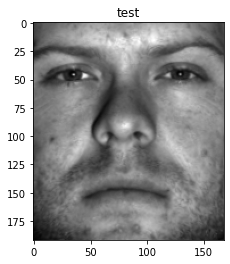

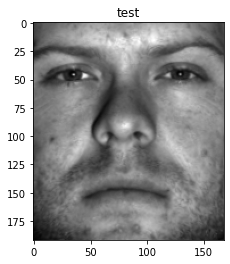

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 192 is different from 168)

In [246]:

image = cv2.imread("faces_training/face01.pgm", cv2.IMREAD_GRAYSCALE)

U, S, V = np.linalg.svd(image, full_matrices=False)

im = np.dot(U, np.dot(np.diag(S), V))

re_err_sum = 0
for i in range(row):
    for j in range(col):
        re_err_sum += (np.abs(train_images[0][i][j]) - im[i][j])**2

print(np.abs(re_err_sum)/(row*col))

plt.title("test")
plt.imshow(im, cmap='gray')
plt.show()

plt.title("test")
plt.imshow(train_images[0], cmap='gray')
plt.show()


In [ ]:
import matplotlib.pyplot as plt # 주피터 환경에서 이미지 열어주는거

f = open(os.path.join(STUDENT_CODE, FILE_NAME),'w')

print("######### Step2 #########")
f.write("######### Step2 #########\n")

print("Reconstruction error")
f.write("Reconstruction error\n")

re_error = []
re_imgs = []
print(f"{length}, {height}")

for n in range(3):
    re_err_sum = 0
    re_img = reconstruct.T[n].reshape(length, height)
    for i in range(row):
        for j in range(col):
            re_err_sum += np.abs(train_images[n][i][j] - re_img[i][j])**2
    
    re_error.append(re_err_sum/(row*col))
    re_imgs.append(re_img)

plt.title("test")
plt.imshow(train_images[0], cmap='gray')
plt.show()
plt.title("test")
plt.imshow(re_imgs[0], cmap='gray')
plt.show()

rrr = 0
for i in range(row):
    for j in range(col):
        rrr += np.abs(train_images[0][i][j] - re_imgs[0][i][j])**2

print(train_images[0])
print(re_imgs[0])

print(rrr)     

print(f"average : {sum(re_error)/len(re_error)}")
f.write(f"average : {sum(re_error)/len(re_error)}\n")
for n in range(1, 10):
    print(f"0{n}: {re_error[n-1]}")
    f.write(f"0{n}: {re_error[n-1]}\n")
    cv2.imwrite(f"{STUDENT_CODE}/face0{n}.png", re_imgs[n-1])
    
for n in range(10, 40):
    print(f"{n}: {re_error[n-1]}")
    f.write(f"{n}: {re_error[n-1]}\n")
    cv2.imwrite(f"{STUDENT_CODE}/face{n}.png", re_imgs[n-1])

f.close()